In [2]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

### Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

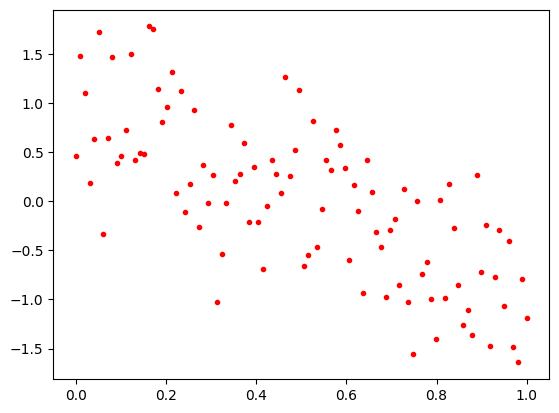

In [7]:
np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(dx,dy,'.r')

1) What exactly are we trying to minimize and why?

We are trying to find a line $y = mx+c$ that best fits the data points. To do this, we need to minimize the error between the predicted values ($y_{pred} = mx_i+c$) and the actual values ($y_i$). A common choice for the error function is the **Mean Squared Error (MSE)**, which is the average of the squared differences between the predicted and actual values.

The function we want to minimize, called the cost function, is:
$$ J(m,c) = \frac{1}{N}\sum_{i=1}^N (y_i - (m x_i + c))^2 $$

We will use gradient descent to find the values of $m$ and $c$ that minimize this function.

2) Minimize and Visualize it.

Optimized parameters: m = -1.9859634821102534, c = 1.0065361812132596


Text(0.5, 1.0, 'Linear Regression using Gradient Descent')

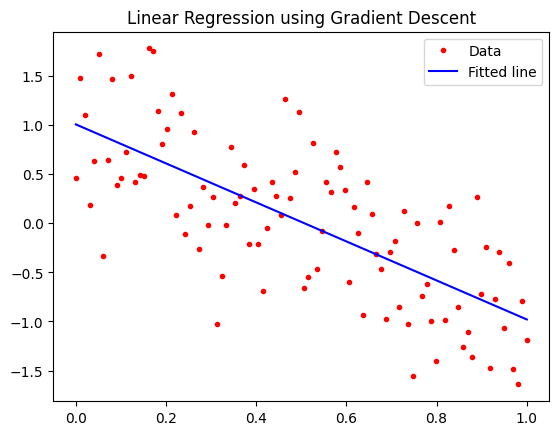

In [ ]:
# solve using gradient descent



Optimized m: -1.9859666729737384
Optimized c: 1.0065378897543729


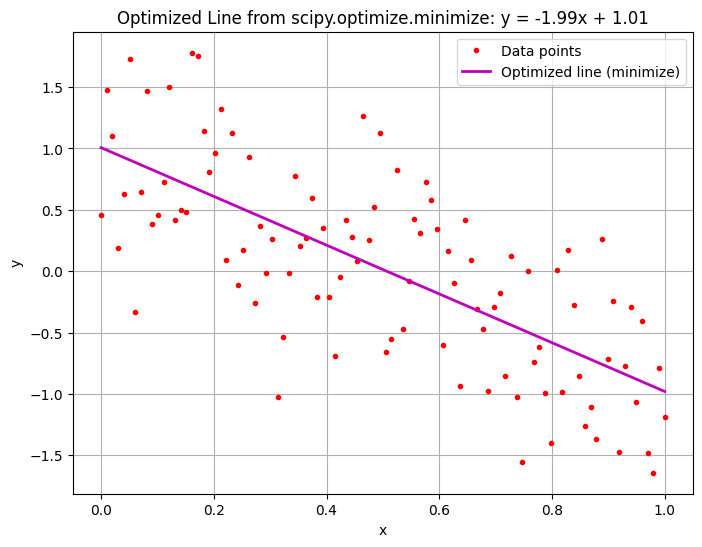

In [ ]:
# solve using scipy.optimize.minimize

from scipy.optimize import minimize

# solve

# plot the result from scipy.optimize.minimize


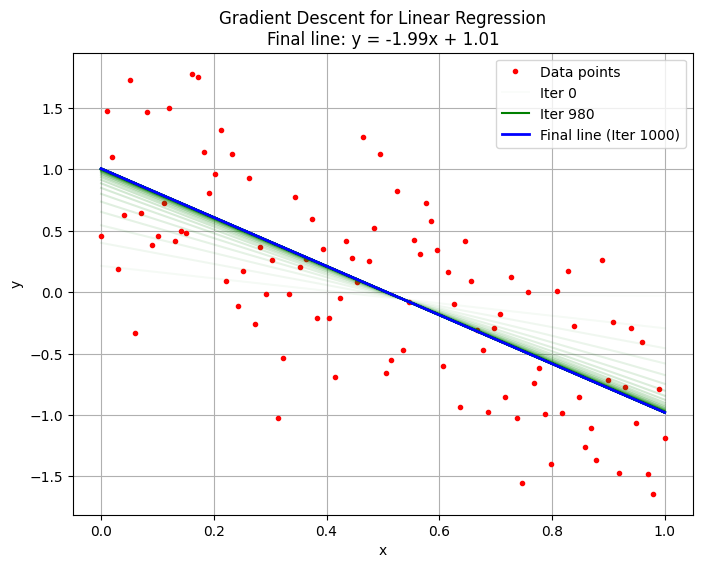

Final m: -1.9859634821102534
Final c: 1.0065361812132596


In [18]:
# Initial values
m = 0
c = 0

# Learning rate
alpha = 0.1

# Number of iterations
iterations = 1000

n_points = float(len(dx))

history = []

# Gradient Descent
for i in range(iterations):
    y_pred = m * dx + c
    # Calculate gradients
    D_m = (-2/n_points) * sum(dx * (dy - y_pred))
    D_c = (-2/n_points) * sum(dy - y_pred)
    # Update parameters
    m = m - alpha * D_m
    c = c - alpha * D_c
    
    if i % 20 == 0:
        history.append((m,c))

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(dx, dy, '.r', label='Data points')
x_line = np.linspace(0, 1, 100)

# Plot history of lines
for i, (m_h, c_h) in enumerate(history):
    y_line = m_h * x_line + c_h
    plt.plot(x_line, y_line, 'g-', alpha=(i+1)/len(history), label=f'Iter {i*20}' if i==0 or i==len(history)-1 else "")

# Plot final line
y_line = m * x_line + c
plt.plot(x_line, y_line, 'b-', linewidth=2, label=f'Final line (Iter {iterations})')
plt.title(f"Gradient Descent for Linear Regression\nFinal line: y = {m:.2f}x + {c:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final m: {m}")
print(f"Final c: {c}")

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [39]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

colors = np.zeros(n1+n2)
colors[:n1] = 1.
colors[n1:] = 0.
#print colors

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

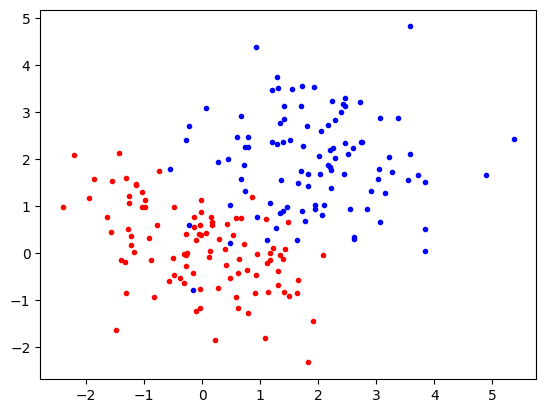

In [40]:
plt.plot(d[colors==1,0], d[colors==1,1],'.r')#note boolean indexing
plt.plot(d[colors==0,0], d[colors==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?


In [1]:
# create a function to penalize the dot when they are on the wrong side of the line

